# Final Project - Tesla and GameStop Dashboard


## Question 1 - Extracting Tesla Stock Data Using yfinance

In [1]:
#!pip install yfinance
#!pip install pandas
#!pip install plotly
#!pip install html5lib
#!pip install matplotlib

In [3]:
import yfinance as yf
import pandas as pd

tesla_data = yf.Ticker('TSLA')
tesla_stock = tesla_data.history(period='max')
tesla_stock.reset_index(inplace=True)
tesla_stock.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [4]:

import requests
from bs4 import BeautifulSoup

url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

tesla_revenue.tail()


,Date,Revenue
61,2010-09-30,31
62,2010-06-30,28
63,2010-03-31,21
64,2009-09-30,46
65,2009-06-30,27


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [6]:

gme_data = yf.Ticker('GME')
gme_stock = gme_data.history(period='max')
gme_stock.reset_index(inplace=True)
gme_stock.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [7]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find the revenue table
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

gme_revenue.tail()


,Date,Revenue
73,2006-01-31,1667
74,2005-10-31,534
75,2005-07-31,416
76,2005-04-30,475
77,2005-01-31,709


## Question 5 - Tesla Stock and Revenue Dashboard

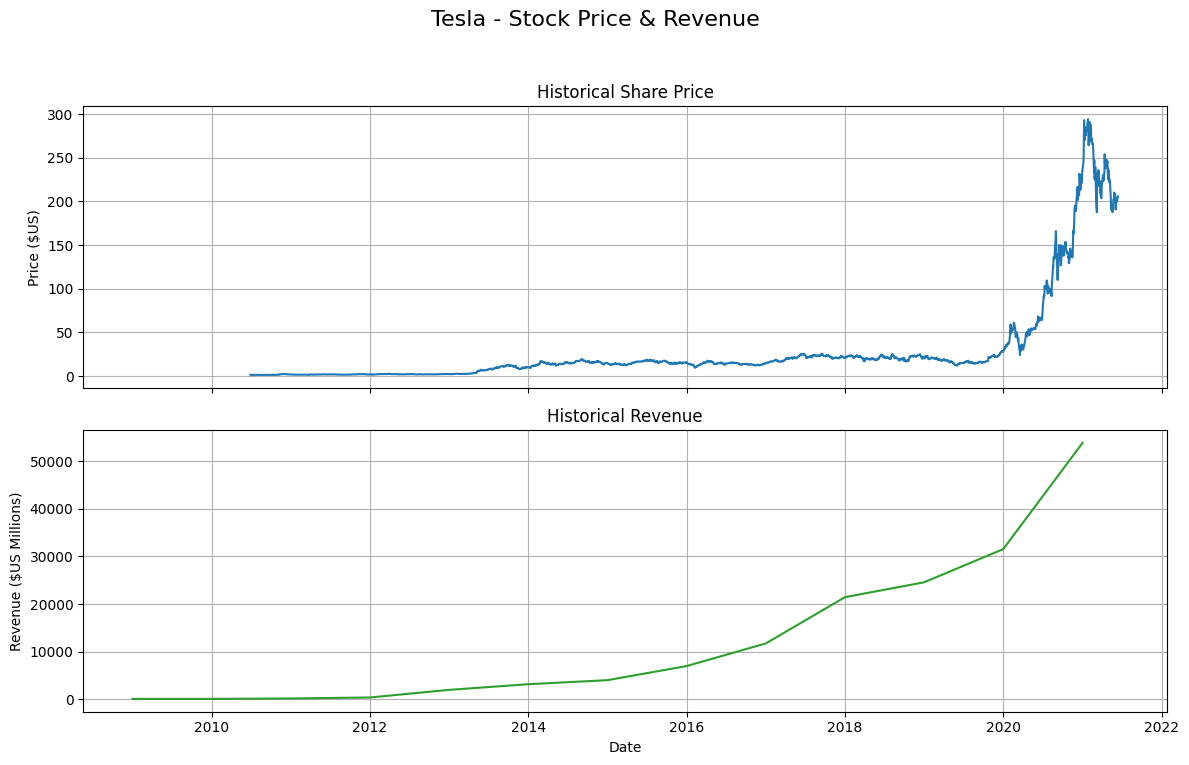

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):
    stock_data = stock_data.copy()
    revenue_data = revenue_data.copy()

    stock_data = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-04-30']

    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce')

    revenue_data['Revenue'] = revenue_data['Revenue'].astype(str)
    revenue_data['Revenue'] = revenue_data['Revenue'].str.replace(r'[\$,]', '', regex=True)
    revenue_data = revenue_data[revenue_data['Revenue'].str.strip() != '']
    revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')
    revenue_data = revenue_data.dropna(subset=['Revenue', 'Date'])

    stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')
    stock_data = stock_data[stock_data['Close'].notna()]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"{stock_name} - Stock Price & Revenue", fontsize=16)

    ax1.plot(stock_data['Date'], stock_data['Close'], label='Share Price', color='tab:blue')
    ax1.set_ylabel('Price ($US)')
    ax1.set_title('Historical Share Price')
    ax1.grid(True)

    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='tab:green')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue ($US Millions)')
    ax2.set_title('Historical Revenue')
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


make_graph(tesla_stock, tesla_revenue, "Tesla")


## Question 6 - GameStop Stock and Revenue Dashboard

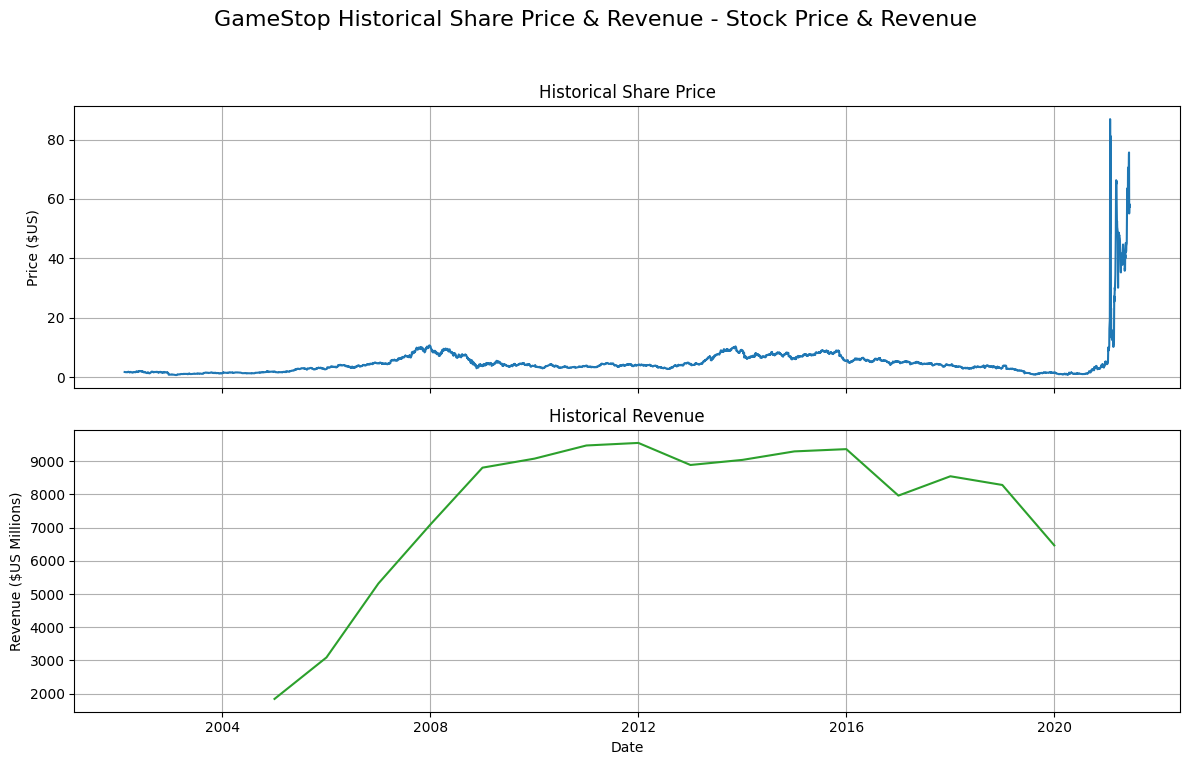

In [9]:
make_graph(gme_stock, gme_revenue, 'GameStop Historical Share Price & Revenue')

## Question 7 - Sharing your Assignment Notebook



GitHub Link: https://github.com/rvg1212/Analyzing-Historical-Stock-Revenue-Data-and-Building-a-Dashboard/